# Visualize Training Logs - Evaluation Metrics for Each Class in the Training Set

During model training, logs are generated in the `work_dirs` directory. These logs contain information on loss functions and evaluation metrics, which can be parsed and visualized.


## Visualization helper functions

In [1]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    Generate a random plot line style
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## Enter the MMSegmentation home directory

In [2]:
import os
os.chdir('mmsegmentation')

In [3]:
os.getcwd()

'/home/featurize/work/CFA/mmsegmentation'

## Import Toolkit

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## List of categories

In [7]:
# List of categories
class_list = ['background', 'sandwich', 'fries', 'drink']

## Load the log file

In [8]:
# Log file path
log_path = './work_dirs/ZihaoDataset-FastSCNN/20250408_125427/20250408_125427.log'

In [9]:
with open(log_path, 'r') as f:
    logs = f.read()

In [10]:
# Define regular expressions
import re
import numpy as np

def transform_table_line(raw):
    raw = list(map(lambda x: x.split('|'), raw))
    raw = list(map(
      lambda row: list(map(
          lambda col: float(col.strip()),
          row
      )),
      raw
    ))
    return raw

## Horizontal axis - number of training iterations

In [11]:
x = range(500, 30500, 500)

In [12]:
len(x)

60

## Define regular expressions

In [13]:
metrics_json = {}
for each_class in class_list: # Iterate over each class
    re_pattern = r'\s+{}.*?\|(.*)?\|'.format(each_class) # Define regex for the class
    metrics_json[each_class] = {}
    metrics_json[each_class]['re_pattern'] = re.compile(re_pattern)

In [14]:
# Matching
for each_class in class_list: # Iterate over each class
    find_string = re.findall(metrics_json[each_class]['re_pattern'], logs) # Rough match
    find_string = transform_table_line(find_string) # Fine match
    metrics_json[each_class]['metrics'] = find_string

In [15]:
metrics_json.keys()

dict_keys(['background', 'sandwich', 'fries', 'drink'])

In [16]:
y = metrics_json[each_class]['metrics']

In [17]:
len(y)

60

## View evaluation metrics for a specific category: IoU, Acc, Dice, Fscore, Precision, Recall

In [21]:
each_class = 'sandwich'
each_class_metrics = np.array(metrics_json[each_class]['metrics'])

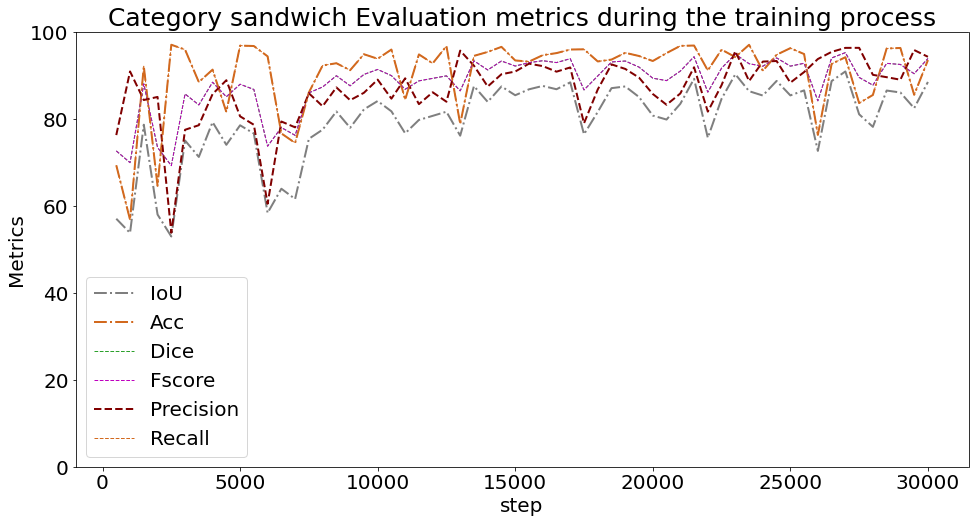

In [22]:
plt.figure(figsize=(16, 8))

for idx, each_metric in enumerate(['IoU', 'Acc', 'Dice', 'Fscore', 'Precision', 'Recall']):

    try:
        plt.plot(x, each_class_metrics[:,idx], label=each_metric, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('Category {} Evaluation metrics during the training process'.format(each_class), fontsize=25)

plt.legend(fontsize=20)
# plt.savefig('charts/category_{}_training_evaluation_metrics.pdf'.format(each_class), dpi=120, bbox_inches='tight')

plt.show()

## The number of elements in x should match the number of elements in `metrics_json[each_class]['metrics']` for the plot to be successful

## View evaluation metrics for each category: IoU, Acc, Dice, Fscore, Precision, Recall

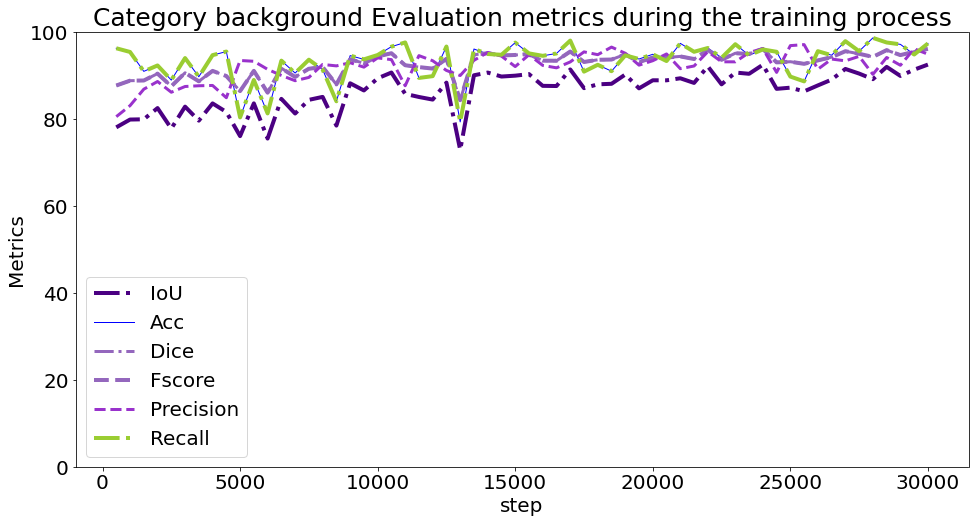

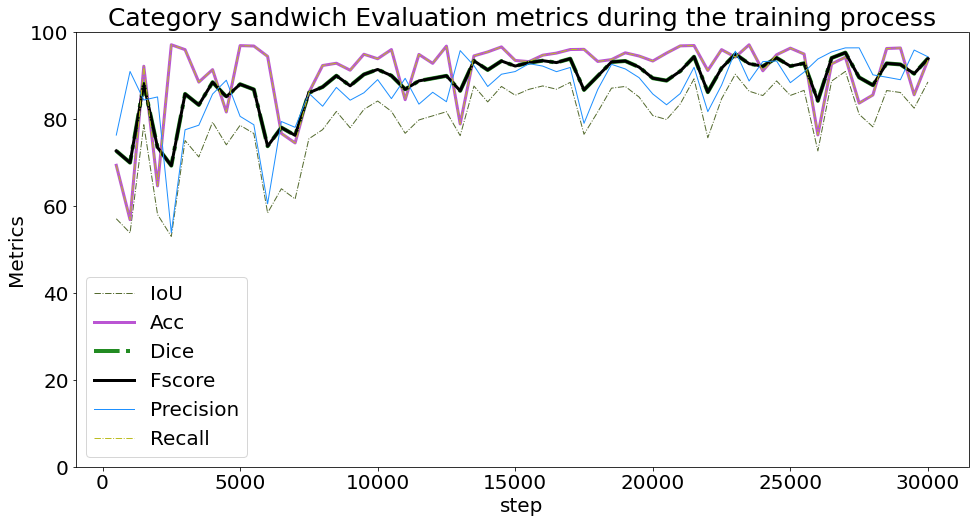

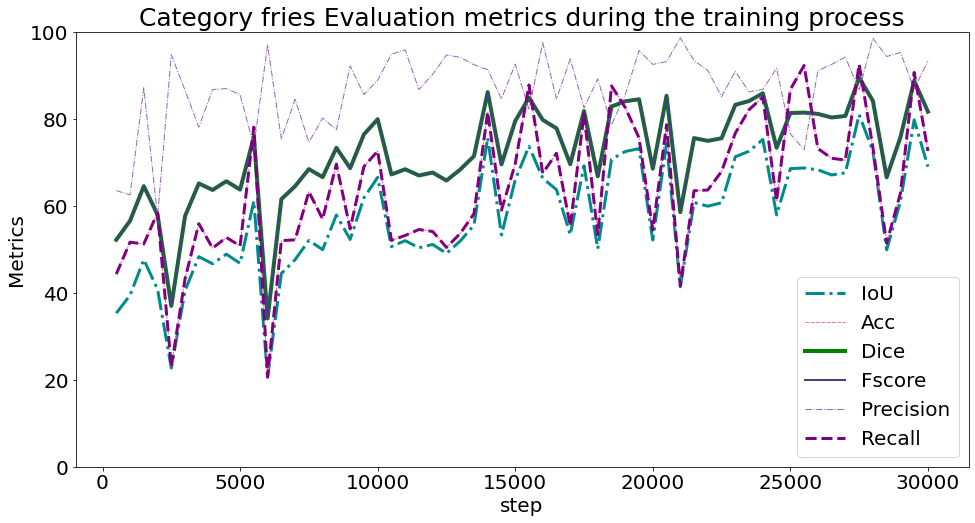

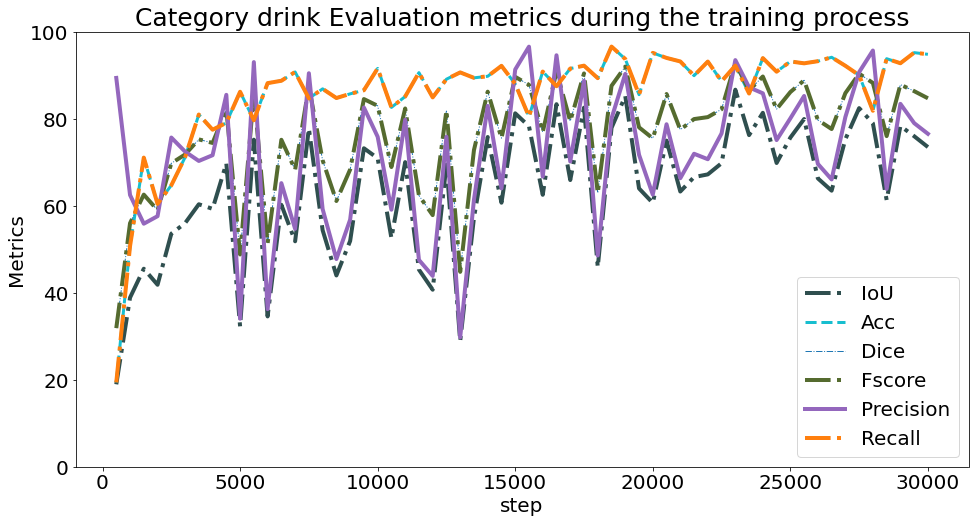

In [23]:
for each_class in class_list: # Iterate over each category
    each_class_metrics = np.array(metrics_json[each_class]['metrics'])
    
    plt.figure(figsize=(16, 8))

    for idx, each_metric in enumerate(['IoU', 'Acc', 'Dice', 'Fscore', 'Precision', 'Recall']):

        try:
            plt.plot(x, each_class_metrics[:,idx], label=each_metric, **get_line_arg())
        except:
            pass

    plt.tick_params(labelsize=20)
    plt.ylim([0, 100])
    plt.xlabel('step', fontsize=20)
    plt.ylabel('Metrics', fontsize=20)
    plt.title('Category {} Evaluation metrics during the training process'.format(each_class), fontsize=25)

    plt.legend(fontsize=20)

    plt.savefig(f'Category_{each_class}_training_evaluation_metrics.pdf', dpi=120, bbox_inches='tight')

    plt.show()